# Lab7, Problem 1

Neural networks are trained and tested with different datasets to make sure that the networks can actually
deal with new data and not just data it has already seen. If the label of a tested image corresponds to the
largest entry of the output vector, the image has been correctly classified by the network. The fraction of
correctly classified test images is a measure for the network’s performance

#### a) Download the MNIST npy files provided in the shared folder. They contain the MNIST test and the training datasets alongside their labels.
<div>
  <input type="checkbox" name="chk" checked>
  <label for="chk">Done.</label>
</div>






In [31]:
import numpy as np
import matplotlib.pyplot as plt
# Sigmoid activation function
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

# Neural Network class
class NeuralNetwork:
    # Initialization
    def __init__(self, iNodes, hNodes, oNodes, lRate):
        self.iNodes = iNodes
        self.hNodes = hNodes
        self.oNodes = oNodes
        self.wih = np.random.normal(0.0, 0.5, (hNodes, iNodes))
        self.who = np.random.normal(0.0, 0.5, (oNodes, hNodes))
        self.lRate = lRate
        self.actFunc = sigmoid

    # Query the network
    def query(self, inputs):
        inputs = inputs.reshape(-1, 1)  # Flatten and convert to 2D column vector
        hiddenInputs = np.dot(self.wih, inputs)
        hiddenOutputs = self.actFunc(hiddenInputs)
        finalInputs = np.dot(self.who, hiddenOutputs)
        finalOutputs = self.actFunc(finalInputs)
        return finalOutputs

    def train(self, imgArr, target):
        inputs = imgArr.flatten().reshape(-1, 1)  # Ensure it's a 2D column vector
        target = np.array(target, ndmin=2).T

        # Forward pass
        hiddenInputs = np.dot(self.wih, inputs)
        hiddenOutputs = self.actFunc(hiddenInputs)
        finalInputs = np.dot(self.who, hiddenOutputs)
        finalOutputs = self.actFunc(finalInputs)

        # Error calculations
        outputErrors = target - finalOutputs
        hiddenErrors = np.dot(self.who.T, outputErrors)

        # Update weights
        self.who += self.lRate * np.dot((outputErrors * finalOutputs * (1.0 - finalOutputs)), np.transpose(hiddenOutputs))
        self.wih += self.lRate * np.dot((hiddenErrors * hiddenOutputs * (1.0 - hiddenOutputs)), np.transpose(inputs))
    
    # Update with saveWeights and restoreWeights Methods

    def saveWeights(self):
        np.save('wih.npy', self.wih)
        np.save('who.npy', self.who)

    def restoreWeights(self):
        self.wih = np.load('wih.npy')
        self.who = np.load('who.npy')
        
    def plotWeights(self, iteration):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(self.wih, cmap='Greys', interpolation='None')
        plt.title(f'Input to Hidden Weights at Iteration {iteration}')

        plt.subplot(1, 2, 2)
        plt.imshow(self.who, cmap='Greys', interpolation='None')
        plt.title(f'Hidden to Output Weights at Iteration {iteration}')

        plt.tight_layout()
        plt.show()

#### b) Create a network with 784 input nodes, 100 hidden nodes, 10 output nodes and a learning rate of 0.6. Train the network with all 60000 images of the dataTrain dataset. 

<div>
  <input type="checkbox" name="chk" checked>
  <label for="chk">Done.</label>
</div>

#### b)  Write a function or a method evaluate that determines the fraction of dataTest images that the network classifies correctly. What is the performance of your network? Hint: np.argmax(arr) returns the index of the largest element of arr .... 

<div>
  <input type="checkbox" name="chk" checked>
  <label for="chk">Done.</label>
</div>


#### b)  Use plt.imshow (see session 6) to plot the weight matrices of the trained network. What has changed compared to the untrained state?

<div>
  <input type="checkbox" name="chk" checked>
  <label for="chk">Done.</label>
</div>




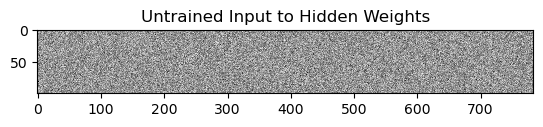

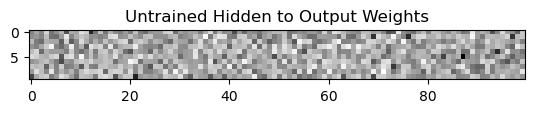

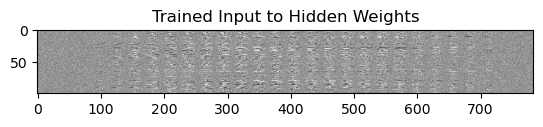

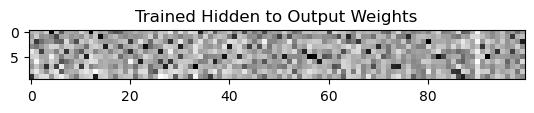

Performance: 0.9026


In [27]:
if __name__ == "__main__":
    # Load MNIST data from .npy files
    data_train = np.load('/mnt/share/nnds/mnist/mnistDataTrain.npy')
    labels_train = np.load('/mnt/share/nnds/mnist/mnistLabelsTrain.npy')
    data_test = np.load('/mnt/share/nnds/mnist/mnistDataTest.npy')
    labels_test = np.load('/mnt/share/nnds/mnist/mnistLabelsTest.npy')

    # Create the neural network
    nn = NeuralNetwork(784, 100, 10, 0.6)

    # Visualize untrained weight matrices
    plt.imshow(nn.wih, cmap='Greys', interpolation='None')
    plt.title('Untrained Input to Hidden Weights')
    plt.show()
    plt.imshow(nn.who, cmap='Greys', interpolation='None')
    plt.title('Untrained Hidden to Output Weights')
    plt.show()

    # Train the network with the training data
    for image, label in zip(data_train, labels_train):
        inputs = image
        targets = np.zeros(nn.oNodes) + 0.01
        targets[label] = 0.99
        nn.train(inputs, targets)

    # Visualize trained weight matrices
    plt.imshow(nn.wih, cmap='Greys', interpolation='None')
    plt.title('Trained Input to Hidden Weights')
    plt.show()
    plt.imshow(nn.who, cmap='Greys', interpolation='None')
    plt.title('Trained Hidden to Output Weights')
    plt.show()

    # Evaluate the network with the test data
    scorecard = []
    for image, label in zip(data_test, labels_test):
        inputs = image
        outputs = nn.query(inputs)
        predicted_label = np.argmax(outputs)
        if predicted_label == label:
            scorecard.append(1)
        else:
            scorecard.append(0)
    performance = sum(scorecard) / len(scorecard)
    print(f'Performance: {performance}')


## Problem 2
#### Training large neural network can be a very long process. Therefore, we need a method to permanently save and restore a network’s memory.
a) Write a method saveWeights that saves the matrices wih and who to the disk. Use np. save ( filename , array )and the file name extension *.npy (e.g. filename = "wih.npy") to create binary files.
b) Add a method restoreWeights that restores the network’s memory. Use array = np. load ( filename )to read binary files.
c) Create an instance of the network testNet. Train it, save the network’s weights, set them to 0 andrestore them again. Verify that your network is able to classify handwritten numbers again.

<div>
  <input type="checkbox" name="chk" checked>
  <label for="chk">Done.</label>
</div>




In [28]:
if __name__ == "__main__":
    
    # Load MNIST data from .npy files
    data_train = np.load('/mnt/share/nnds/mnist/mnistDataTrain.npy')
    labels_train = np.load('/mnt/share/nnds/mnist/mnistLabelsTrain.npy')
    data_test = np.load('/mnt/share/nnds/mnist/mnistDataTest.npy')
    labels_test = np.load('/mnt/share/nnds/mnist/mnistLabelsTest.npy')



    # Create the neural network
    testNet = NeuralNetwork(784, 100, 10, 0.6)

    # Train the network
    for image, label in zip(data_train, labels_train):
        inputs = image
        targets = np.zeros(testNet.oNodes) + 0.01
        targets[label] = 0.99
        testNet.train(inputs, targets)

    # Save the network's weights
    testNet.saveWeights()

    # Reset weights to zero
    testNet.wih = np.zeros(testNet.wih.shape)
    testNet.who = np.zeros(testNet.who.shape)

    # Restore the weights
    testNet.restoreWeights()

    # Evaluate the network with the test data (same evaluation code as before)
    scorecard = []
    for image, label in zip(data_test, labels_test):
        inputs = image
        outputs = testNet.query(inputs)
        predicted_label = np.argmax(outputs)
        if predicted_label == label:
            scorecard.append(1)
        else:
            scorecard.append(0)
    performance = sum(scorecard) / len(scorecard)
    print(f'Performance after restoring weights: {performance}')


Performance after restoring weights: 0.9053


## Problem 3
#### This task is intended for those of you who would like to go an extra mile ...
With every training image fed through the network, the weight matrices slightly change.
a) Write a plotWeights(self, filename) method takes a filename and quietly saves the image to a file.
b) Create a network with 784 input nodes, 100 hidden nodes, 10 output nodes and a learning rate of 0.3. Train the network with all 60000 images of the train dataset by iterating through the array and calling the train method for every image. After every 600th iteration, call your plotWeights method. Chose a reasonable name for your image files.
c) Create a gif animation from your image files.

<div>
  <input type="checkbox" name="chk" checked>
  <label for="chk">Done.</label>
</div>




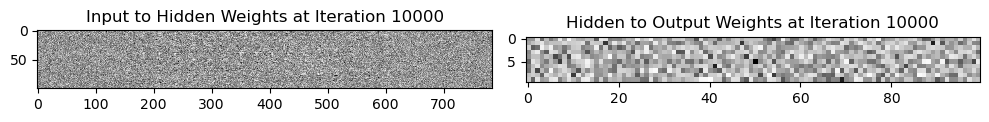

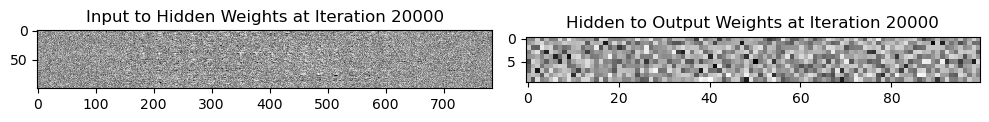

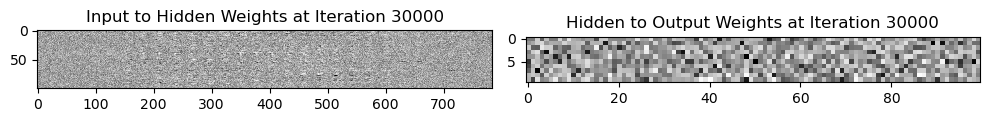

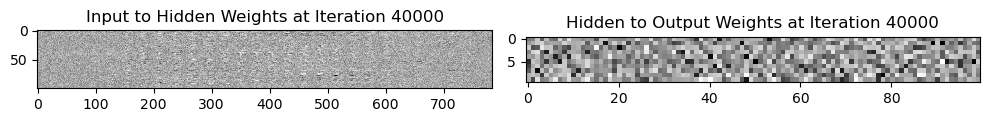

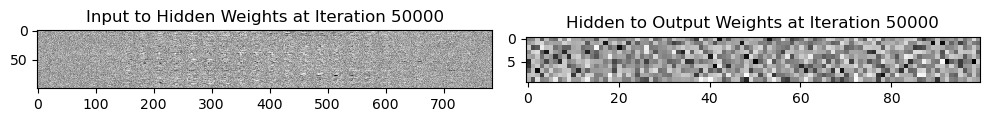

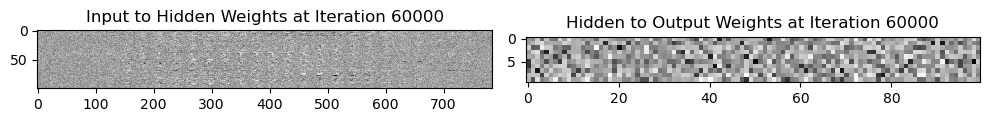

In [33]:
if __name__ == "__main__":
     
    # Load MNIST data from .npy files
    data_train = np.load('/mnt/share/nnds/mnist/mnistDataTrain.npy')
    labels_train = np.load('/mnt/share/nnds/mnist/mnistLabelsTrain.npy')
    data_test = np.load('/mnt/share/nnds/mnist/mnistDataTest.npy')
    labels_test = np.load('/mnt/share/nnds/mnist/mnistLabelsTest.npy')

    # Create the neural network with a learning rate of 0.3
    nn = NeuralNetwork(784, 100, 10, 0.3)

 # Train the network and display weights periodically
    for i, (image, label) in enumerate(zip(data_train, labels_train)):
        inputs = image
        targets = np.zeros(nn.oNodes) + 0.01
        targets[label] = 0.99
        nn.train(inputs, targets)

        if (i + 1) % 10000 == 0:
            nn.plotWeights(i + 1)